In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
url = "insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [6]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# Encode categorical variables
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

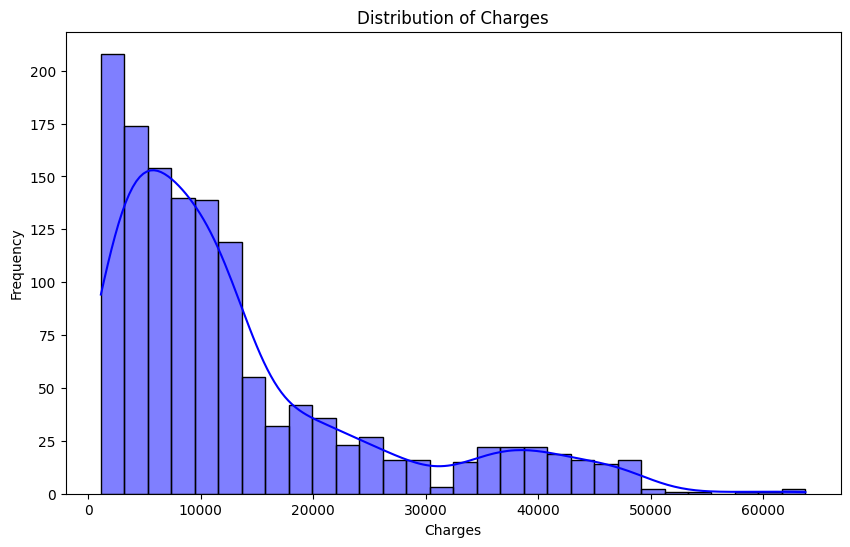

In [8]:
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

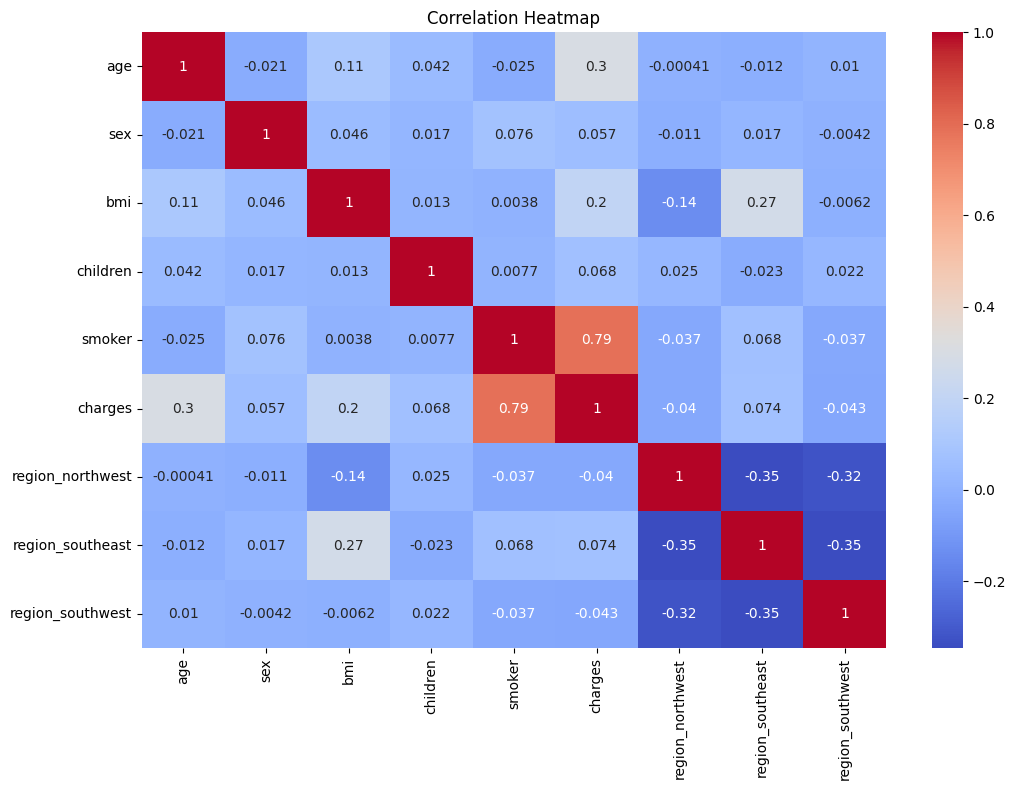

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


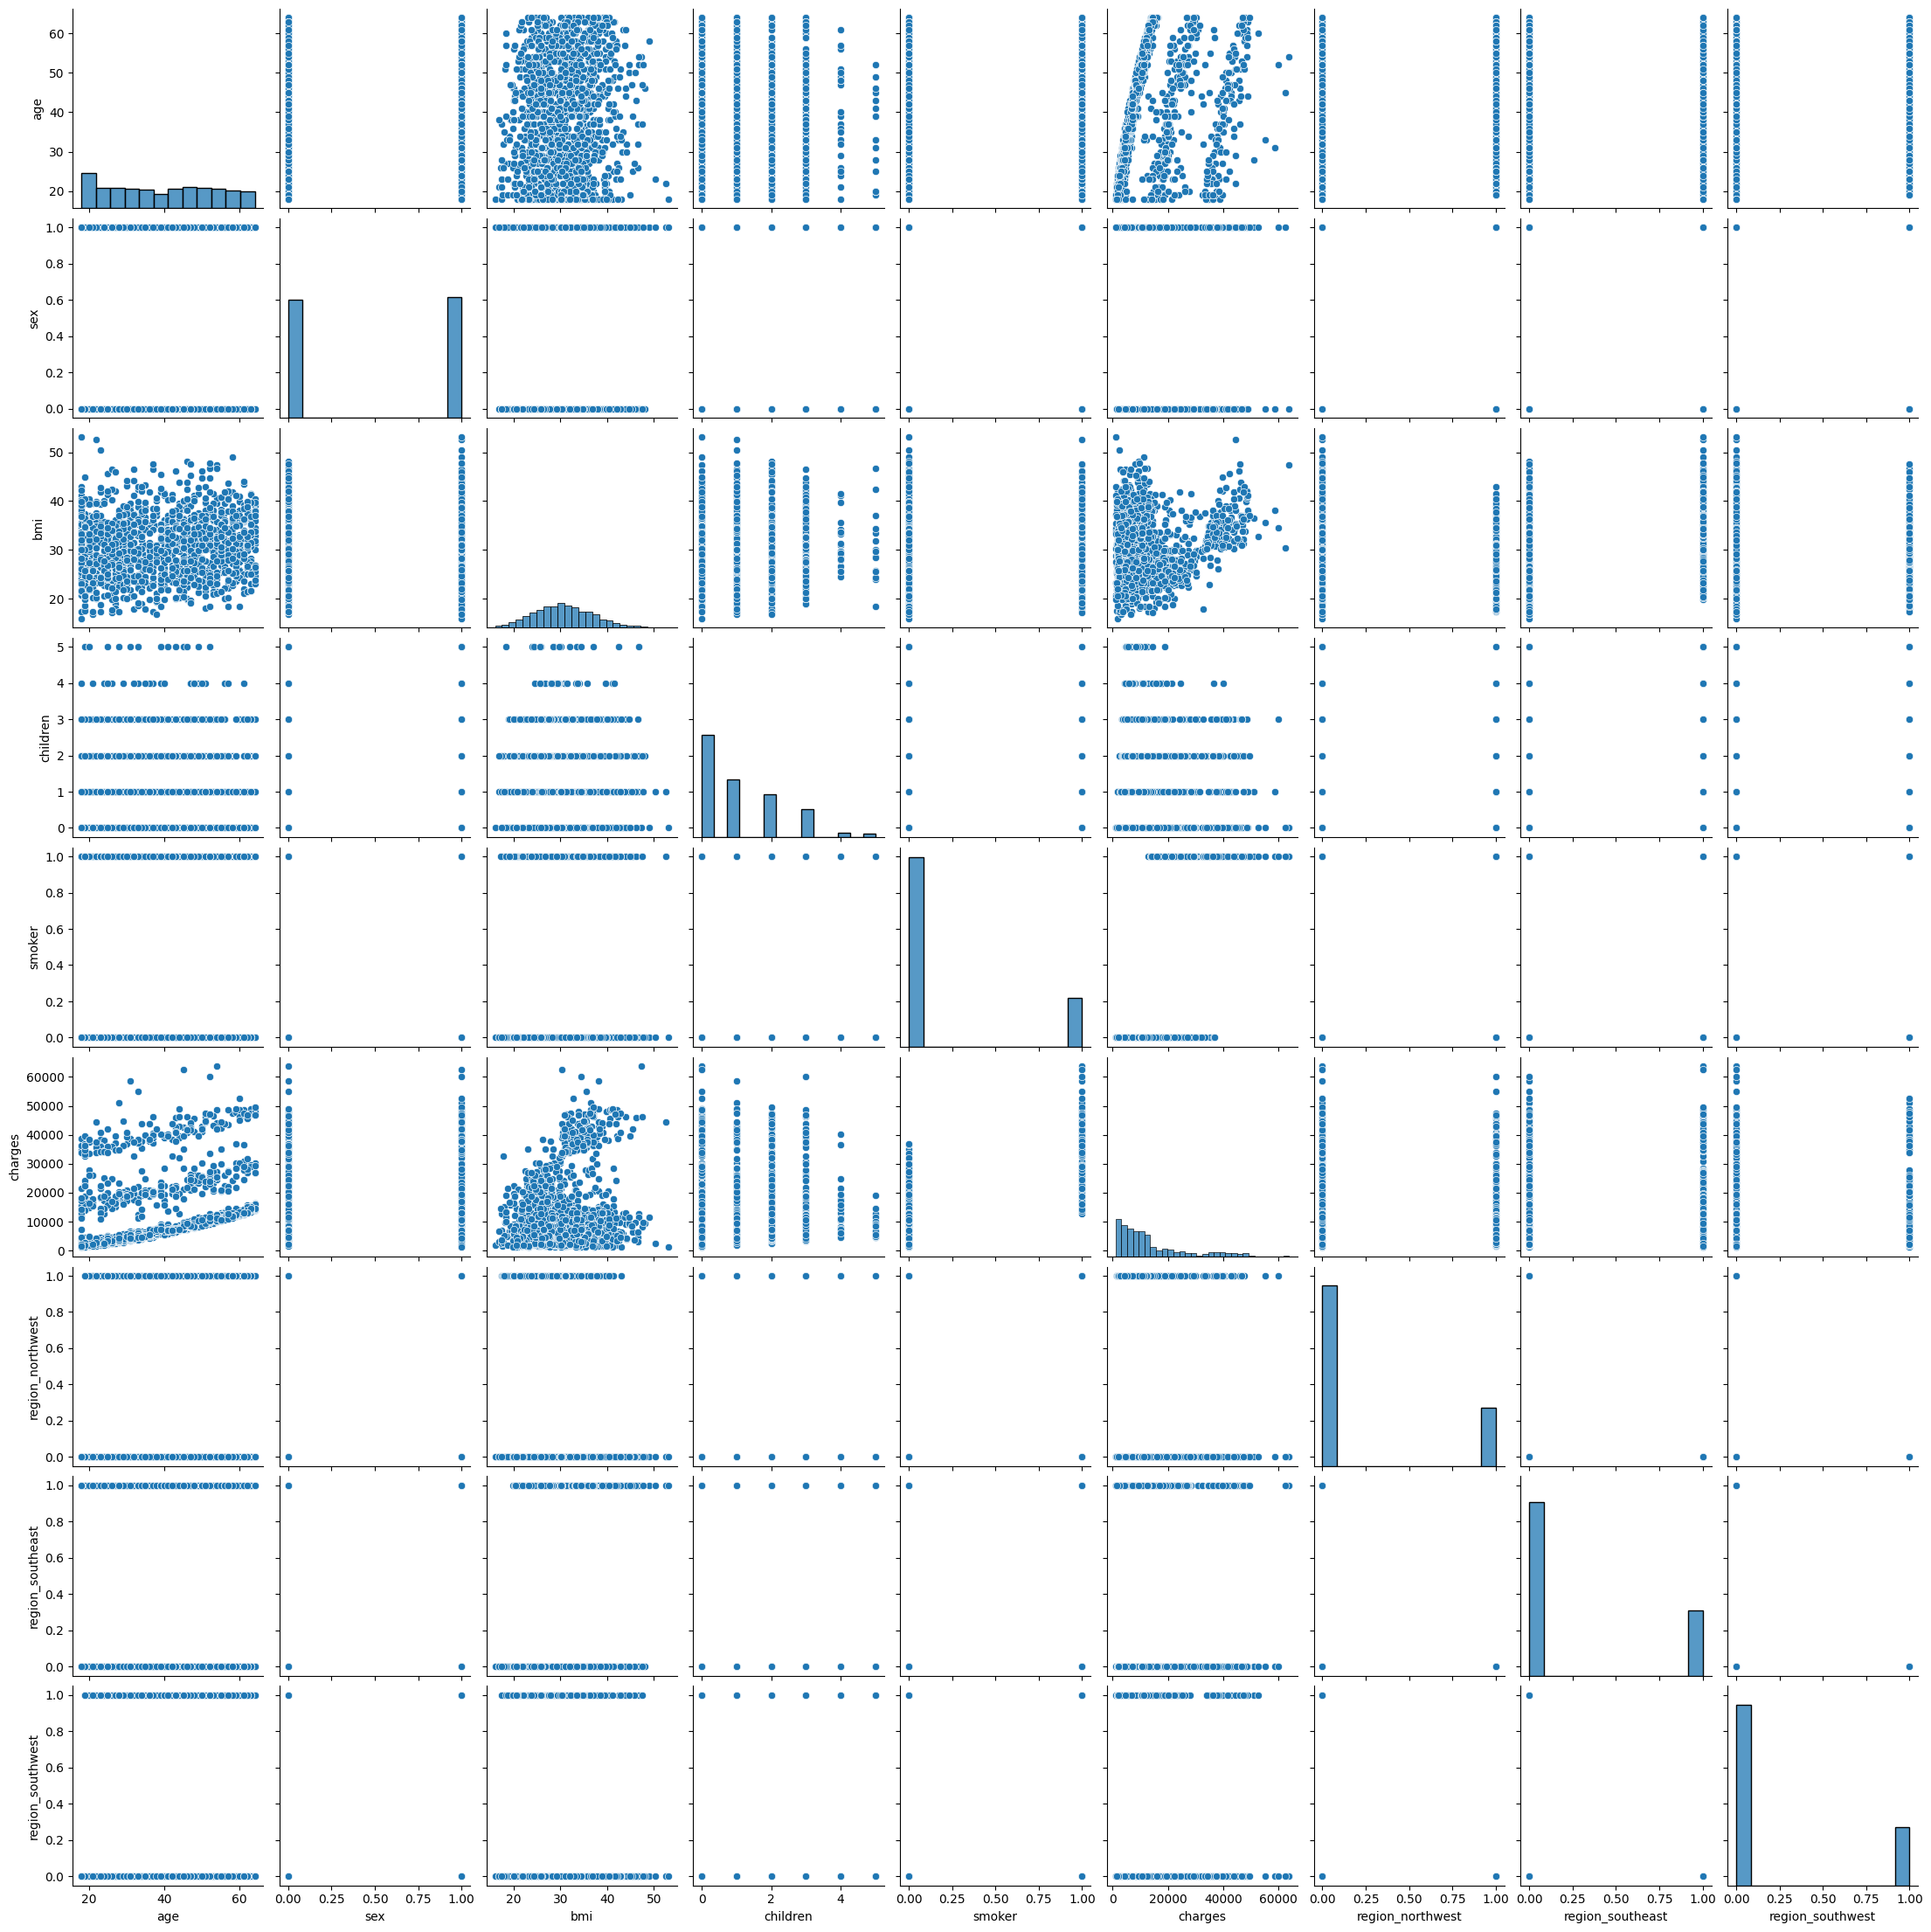

In [10]:
# Pairplot
sns.pairplot(df)
plt.show()

In [11]:
# Define features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f'{model} Predictions vs Actual')
    plt.show()

    return model, mse, r2

In [15]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

Evaluating Linear Regression
Model: LinearRegression()
Mean Squared Error: 33596915.851361476
R^2 Score: 0.7835929767120722


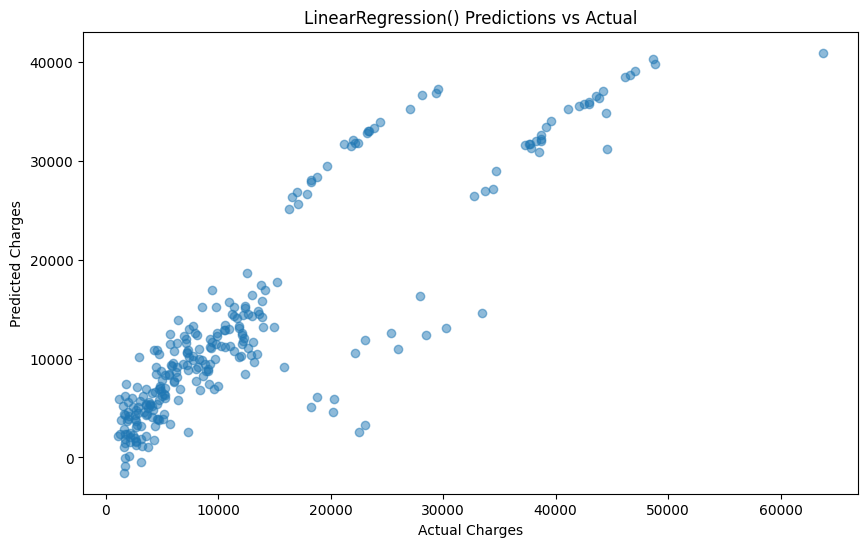

Evaluating Decision Tree
Model: DecisionTreeRegressor(random_state=42)
Mean Squared Error: 40795333.45408598
R^2 Score: 0.7372259788399772


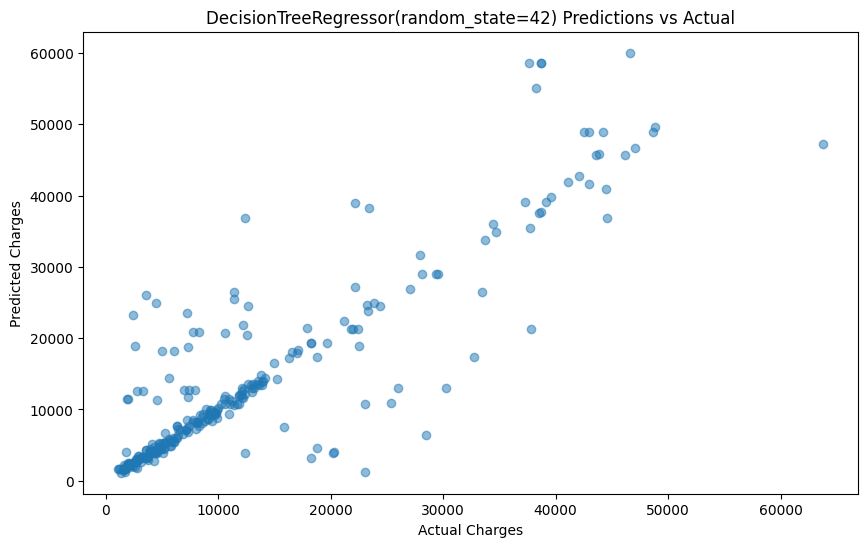

Evaluating Random Forest
Model: RandomForestRegressor(random_state=42)
Mean Squared Error: 20877104.681165546
R^2 Score: 0.8655247970108418


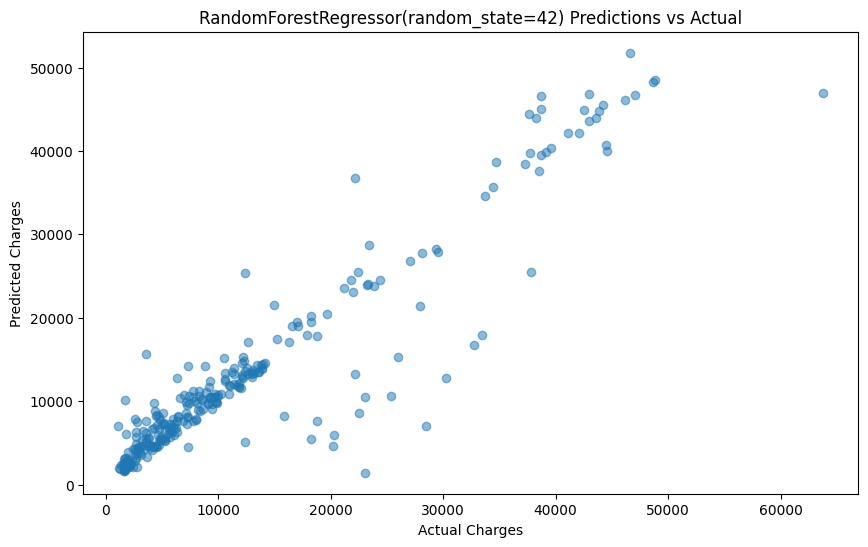

Evaluating Support Vector Regression
Model: SVR()
Mean Squared Error: 166128803.80848217
R^2 Score: -0.07008155372454805


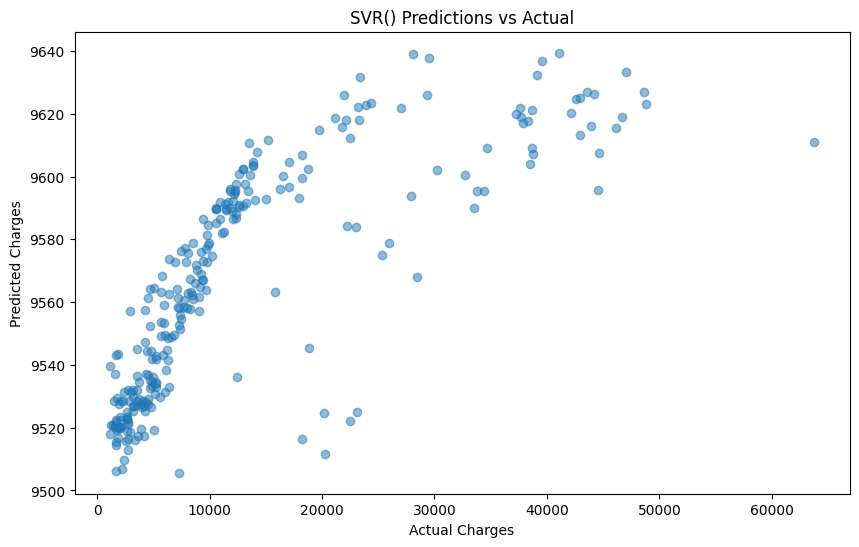

Evaluating Gradient Boosting
Model: GradientBoostingRegressor(random_state=42)
Mean Squared Error: 18806526.037252024
R^2 Score: 0.878861966493758


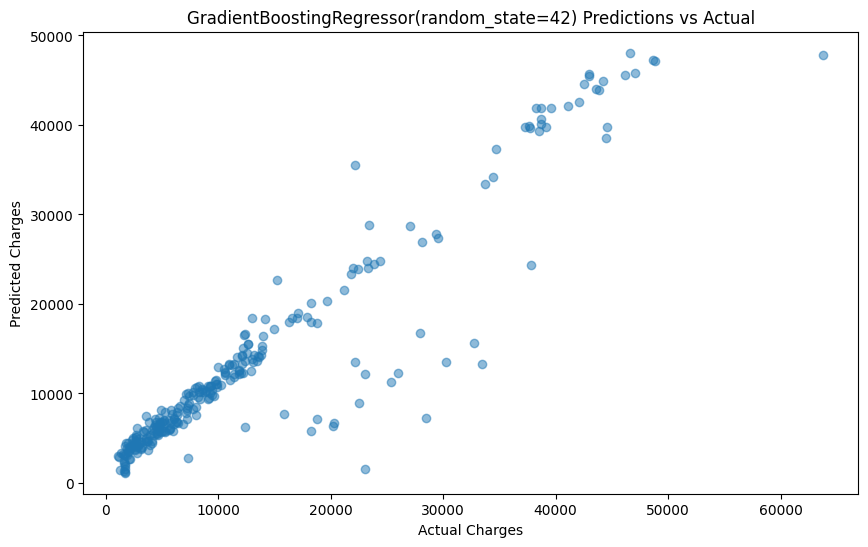

In [16]:
# Evaluate models
results = {}
for name, model in models.items():
    print(f"Evaluating {name}")
    model, mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'Model': model, 'MSE': mse, 'R2': r2}


In [17]:
# Comparison of model performance
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)

                                                                       Model  \
Gradient Boosting          ([DecisionTreeRegressor(criterion='friedman_ms...   
Random Forest              (DecisionTreeRegressor(max_features=1.0, rando...   
Linear Regression                                         LinearRegression()   
Decision Tree                         DecisionTreeRegressor(random_state=42)   
Support Vector Regression                                              SVR()   

                                        MSE        R2  
Gradient Boosting           18806526.037252  0.878862  
Random Forest               20877104.681166  0.865525  
Linear Regression           33596915.851361  0.783593  
Decision Tree               40795333.454086  0.737226  
Support Vector Regression  166128803.808482 -0.070082  


In [18]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    print(f'Model: {name}')
    print(f'Cross-Validated MSE: {np.mean(-scores)}')

Model: Linear Regression
Cross-Validated MSE: 36990225.36687711
Model: Decision Tree
Cross-Validated MSE: 43812172.983403586
Model: Random Forest
Cross-Validated MSE: 23878164.854418624
Model: Support Vector Regression
Cross-Validated MSE: 161651857.52432877
Model: Gradient Boosting
Cross-Validated MSE: 20731851.86355499


In [19]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=models['Random Forest'], param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best parameters for Random Forest: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)
Mean Squared Error: 19011410.546196193
R^2 Score: 0.8775422487287531


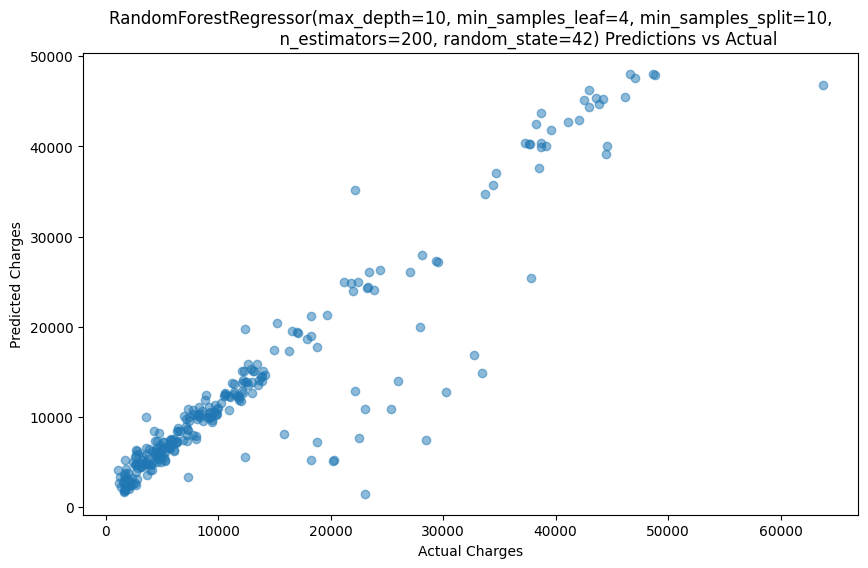

(RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42),
 19011410.546196193,
 0.8775422487287531)

In [20]:
# Evaluate the tuned model
evaluate_model(best_rf, X_train, y_train, X_test, y_test)

In [23]:
#  Model performance comparison
#results_df.plot(kind='bar', figsize=(12, 6))
#plt.title('Model Performance Comparison')
#plt.xlabel('Model')
#plt.ylabel('Score')
#plt.show()